## **Random Sample Imputation for Numerical Data**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
titanic_df = pd.read_csv('D:/Academics/AI/Data Sets/Titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [37]:
titanic_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
titanic_df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

**Splitting the target variable**

In [39]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [42]:
X_train.head()

,Age,Fare
793,NaN,30.6958
23,28.0,35.5000
97,23.0,63.3583
9,14.0,30.0708
157,30.0,8.0500


In [43]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [44]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [45]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29.  , 20.5 ,  0.83, 31.  , 18.  , 31.  , 49.  , 36.  , 15.  ,
       24.  , 21.  , 30.  , 21.  , 37.  , 19.  , 26.  , 19.  , 21.  ,
       30.  , 17.  , 21.  , 24.  , 24.  , 50.  , 60.  , 25.  , 17.  ,
       37.  , 23.  ,  2.  , 19.  , 48.  , 22.  , 33.  , 42.  , 19.  ,
       36.  , 18.  , 16.  , 24.  , 49.  , 22.  , 40.  , 35.  , 36.  ,
       27.  , 34.  , 25.  , 34.  , 50.  , 49.  , 26.  , 10.  ,  3.  ,
       17.  , 52.  , 25.  , 24.  , 30.  , 24.  , 28.  , 29.  , 41.  ,
       45.5 , 43.  , 22.  , 21.  , 23.  , 44.  , 30.5 , 18.  , 14.  ,
       21.  , 24.  , 47.  , 24.  , 52.  , 16.  , 24.  , 31.  , 21.  ,
       32.  , 21.  , 45.  , 55.  , 18.  , 25.  , 24.  , 31.  , 27.  ,
       32.  , 29.  ,  3.  , 24.  , 37.  , 34.  , 44.  , 19.  , 28.5 ,
       65.  , 48.  , 39.  , 22.  , 40.  , 34.  , 42.  , 16.  , 39.  ,
       29.  , 57.  , 32.  , 19.  , 31.  , 23.5 , 40.5 , 23.  , 26.  ,
        1.  , 19.  , 31.  , 56.  , 30.  , 45.  , 36.  , 35.  , 39.  ,
       29.  , 23.  ,

In [46]:
X_train.head()

,Age,Fare,Age_imputed
793,NaN,30.6958,36.0
23,28.0,35.5000,28.0
97,23.0,63.3583,23.0
9,14.0,30.0708,14.0
157,30.0,8.0500,30.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_6688\4143349704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False, color='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6688\4143349704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

<Axes: xlabel='Age_imputed', ylabel='Density'>

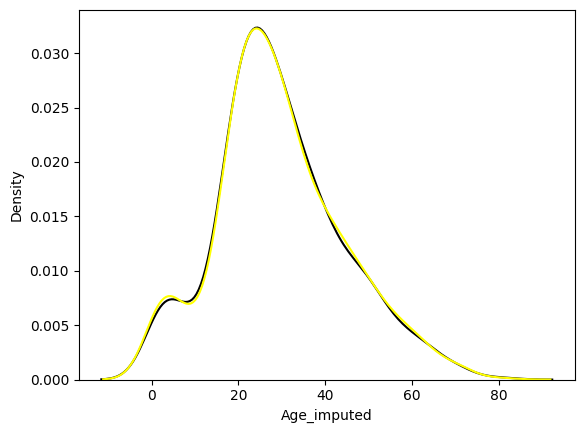

In [50]:
sns.distplot(X_train['Age'], label='Original', hist=False, color='black')
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False, color='yellow')

In [48]:
print('Original variable variance:', X_train['Age'].var())
print('Variance after random imputation:', X_train['Age_imputed'].var())

Original variable variance: 211.94863002798428
Variance after random imputation: 215.74752226785347


<Axes: >

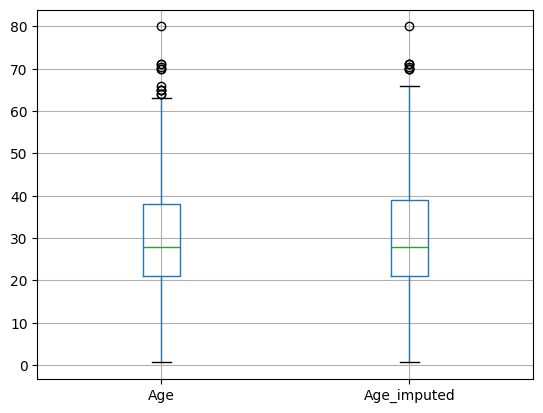

In [49]:
X_train[['Age', 'Age_imputed']].boxplot()